# Assignment 1
## Dataset: titanic.xlsx

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, math

# Fetch the data and take a peek what's inside
df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/titanic.xlsx')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Get some idea of the figures
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Basic demographics

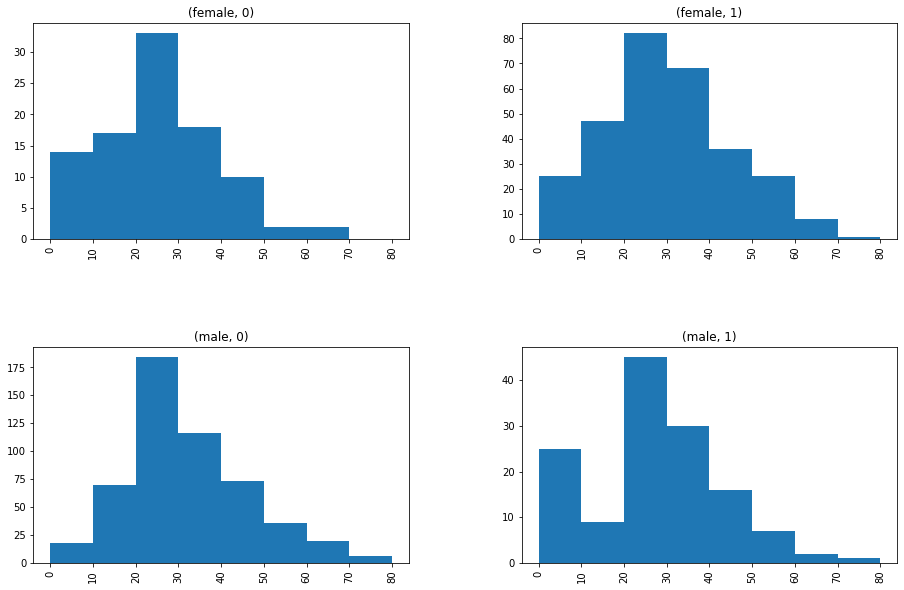

In [5]:
# Lets plot ages over sex and whether one has survived 
ax = df.hist(column='age', by=['sex','survived'], bins = range(0,90,10), figsize=[15,10])

Distributions are sure interesting and nice, but by themselves these don't give much insight on who survived vs. who did not.
Let's compare the relative figures of survivors and lost instead

## Further analysis

In [65]:
n = len(df.index)

df.groupby(['sex','pclass']).agg(
    # Using lambda functions within agg provides sql-esque approach to calculating multiple measures over a common group
    Survivors=('survived', lambda x: x.sum())
    , Lost=('survived', lambda x: x.count() - x.sum())
    , SurvivalRatio=('survived', lambda x: round(x.sum()/x.count(),2))   # Survivor ratio within the aggregate group
    , SurvivalRatioTotal=('survived', lambda x: round(x.sum()/n,2))         # Survivor ratio within entire population
    )

Survivors  Lost  SurvivalRatio  SurvivalRatioTotal
sex    pclass                                                    
female 1             139     5           0.97                0.11
       2              94    12           0.89                0.07
       3             106   110           0.49                0.08
male   1              61   118           0.34                0.05
       2              25   146           0.15                0.02
       3              75   418           0.15                0.06

Now the figures are starting to tell something:
* Almost all females with the 1st class tickets survived, from males only 1/3 of 1st class ticket holders survived
** Next step could be to verify whether "ladies and children first" applied to the accident
* As one could imagine, males holding the lowest class of tickets had the roughest outcome